<a href="https://colab.research.google.com/github/rikurzt/Finacial_analyze_course_HW/blob/main/%E9%87%91%E8%9E%8D%E5%A4%A7%E6%95%B8%E6%93%9A_HW11_7113029027%E6%9D%8E%E5%86%A0%E5%BB%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 資料前處理

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:

import pandas as pd

# 讀取兩個 CSV 檔案
news_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/fin_hw1/Combined_News_DJIA(train).csv')
djia_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/fin_hw1/DJIA_table(train).csv')

# 將日期欄位轉換為 datetime 物件
news_df['Date'] = pd.to_datetime(news_df['Date'])
djia_df['Date'] = pd.to_datetime(djia_df['Date'])


# 合併兩個 DataFrame
merged_df = pd.merge(news_df, djia_df, on='Date', how='inner')


<ipython-input-18-818504a423d6>:9: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  djia_df['Date'] = pd.to_datetime(djia_df['Date'])


In [19]:
djia_df['Date']

,Date
0,2015-12-31
1,2015-12-30
2,2015-12-29
3,2015-12-28
4,2015-12-24
...,...
1858,2008-08-14
1859,2008-08-13
1860,2008-08-12
1861,2008-08-11


In [20]:
merged_df.columns

Index(['Date', 'Label', 'Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7',
       'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15',
       'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23',
       'Top24', 'Top25', 'Open', 'High', 'Low', 'Close', 'Volume',
       'Adj Close'],
      dtype='object')

## 計算指標


In [21]:
!pip install pandas_ta

In [22]:

merged_df['Open'] = pd.to_numeric(merged_df['Open'])
merged_df['High'] = pd.to_numeric(merged_df['High'])
merged_df['Low'] = pd.to_numeric(merged_df['Low'])
merged_df['Close'] = pd.to_numeric(merged_df['Close'])


In [23]:
import pandas as pd
import numpy as np
import pandas_ta as ta

In [24]:
def calculate_sma(data, window):

  return ta.sma(data['Close'], length=window)

def calculate_rsi(data, window):
  return ta.rsi(data['Close'], length=window)

def calculate_macd(data, short_window, long_window, signal_window):
  try:
      macd_df = ta.macd(data['Close'], fast=short_window, slow=long_window, signal=signal_window)
      return macd_df['MACD_12_26_9'], macd_df['MACDh_12_26_9'], macd_df['MACDs_12_26_9']
  except (KeyError, TypeError):
    return None, None, None

def calculate_ema(data, window):
  return ta.ema(data['Close'], length=window)


In [25]:

def calculate_kd(df, n=9):

  df['RSV'] = ((df['Close'] - df['Low'].rolling(n).min()) /
              (df['High'].rolling(n).max() - df['Close'].rolling(n).min())) * 100
  df['K'] = 50
  df['D'] = 50

  for i in range(n, len(df)):
      df['K'].iloc[i] = (df['K'].iloc[i - 1] * 2 / 3) + (df['RSV'].iloc[i] * 1 / 3)
      df['D'].iloc[i] = (df['D'].iloc[i - 1] * 2 / 3) + (df['K'].iloc[i] * 1 / 3)



In [26]:
#cal all metrics
def calculate_all_metrics(df):
  df['SMA_5'] = calculate_sma(df, 5)
  df['SMA_10'] = calculate_sma(df, 10)
  df['SMA_20'] = calculate_sma(df, 20)
  df['RSI_14'] = calculate_rsi(df, 14)
  calculate_kd(df)
  return df
merged_df = calculate_all_metrics(merged_df)

<ipython-input-25-8541282eb7c5>:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['K'].iloc[i] = (df['K'].iloc[i - 1] * 2 / 3) + (df['RSV'].iloc[i] * 1 / 3)
<ipython-input-25-8541282eb7c5>:9: SettingWithCopyWarning: 
A value is trying to b

In [27]:
df = merged_df.copy()
df = df.dropna()
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Close,Volume,Adj Close,SMA_5,SMA_10,SMA_20,RSI_14,RSV,K,D
19,2008-09-05,1,"b'In Jordan, the honor killings that are not: ...",b'U.S. Navy Ship Arrives at Georgian Port Wher...,"b""At least five people have been killed in ano...",b'Polish prosecutors probe possible CIA jail |...,b'Russian Lawmaker Says Moscow to Deploy Weapo...,b' Petraeus says Qaeda still undefeated in Iraq',b'Storm-hit Haitians starve on rooftops.',b'French Government to store personal informat...,...,11220.95996,198300000,11220.95996,11400.590038,11464.781934,11514.566407,36.567395,30.420061,37.836162,49.033530
20,2008-09-08,1,b'A French judge has ordered two branches of S...,b' Russia in legal bid to ban South Park',"b""'60 Minutes' Cut Ahmadinejad's Statement, 'S...",b'U.S. drones kill 13 in missile attack in Pak...,"b'Screw You, TSA: No Conviction on Key Charges...",b'Scientology on trial for fraud in France!',b'An EU ban on ads with sexist overtones? Anot...,b'Film Backs Afghans Claims of US Killings [of...,...,11510.74023,273000000,11510.74023,11393.946092,11453.050000,11503.387403,49.169781,78.561161,51.411162,49.826074
21,2008-09-09,0,b'I love the world: Thai Prime Minister Samak ...,"b""French revolt over Edvige: Nicolas Sarkozy's...","b'Terrorists Fail! ""Time to Carry Liquids on P...","b""If you think 9/11 was an inside job, you'll ...","b""The Dalai Lama's brother has died--pretty in...","b""North Korea's Kim Jong Il may have had a str...","b""How the KGB (and friends) took over Russia's...",b'80% of artists would get &lt;30/year from co...,...,11230.73047,257300000,11230.73047,11336.708202,11437.498047,11475.806446,40.745885,32.043233,44.955186,48.202444
22,2008-09-10,1,b'Dutch to ban burkas when picking children up...,"b""For 21 years a British man has refused to bu...",b'War Nerd - Ossetia: all over but the whining',b'North Korean Leader Kim Jong-il is Confirmed...,b'Polish PM Wants Child Abusers Castrated',b'Russian bombers land in Venezuela',b'Devastating Landslide Kills 56 in China',"b'Iran demands UN investigate Israeli ""threats...",...,11268.91992,214260000,11268.91992,11283.916210,11423.103027,11457.128956,42.200322,38.387634,42.766002,46.390297
23,2008-09-11,1,b'American intelligence confirms that the late...,"b'""The Russians are right! We\'re wrong! Georg...",b'Russian bombers arrive in Venezuela for trai...,"b'Bolivia asks U.S. ambassador to leave, prote...",b' Indian girl kills self over the Large Hadro...,b'Chechen President Ramzan Kadyrov has accused...,b'Three dead in fight over size of genitals',b'Walmart Sets Up Unions for its Employees (in...,...,11433.70996,247820000,11433.70996,11333.012108,11416.223046,11452.166455,48.118174,65.764148,50.432050,47.737548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2015-12-24,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,...,17552.16992,40350000,17552.16992,17390.443750,17435.576953,17559.898536,50.603822,65.165159,54.815125,48.313018
1859,2015-12-28,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",Japan apologizes to Korea over sexual enslavem...,Milan and Rome ban cars as pollution rises. Mi...,Saudi posts record $98 bn deficit in 2015,"The United States, Russia, Iran, and Saudi Ara...",Vladimir Putin has achieved his central goal o...,Noted Syrian journalist who uncovered ISIS Ale...,...,17528.26953,59770000,17528.26953,17470.387500,17461.882812,17545.642480,50.014875,61.588375,57.072875,51.232970
1860,2015-12-29,1,Pentagon thwarts Obama's effort to close Guant...,Rare Footage of Gi

## 資料集切割

In [28]:
import torch
import torch.utils.data as data
import numpy as np
from sklearn.preprocessing import MinMaxScaler


In [29]:
#select feature
feature_num = ['Open', 'High', 'Low', 'Close','SMA_5','SMA_10','SMA_20','RSI_14','K','D']
feature_long= ['Top1', 'Top2', 'Top3', 'Top4', 'Top5','Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']
target = ['Close']
#feature_num=['Open', 'High', 'Low', 'Close','SMA_5','SMA_10','SMA_20','RSI_14','K','D','Top1', 'Top2', 'Top3', 'Top4', 'Top5', 'Top6', 'Top7', 'Top8', 'Top9', 'Top10', 'Top11', 'Top12', 'Top13', 'Top14', 'Top15', 'Top16', 'Top17', 'Top18', 'Top19', 'Top20', 'Top21', 'Top22', 'Top23', 'Top24', 'Top25']

In [30]:
df['combine'] = df[feature_long].apply(lambda x: ' '.join(x), axis=1)
df

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Volume,Adj Close,SMA_5,SMA_10,SMA_20,RSI_14,RSV,K,D,combine
19,2008-09-05,1,"b'In Jordan, the honor killings that are not: ...",b'U.S. Navy Ship Arrives at Georgian Port Wher...,"b""At least five people have been killed in ano...",b'Polish prosecutors probe possible CIA jail |...,b'Russian Lawmaker Says Moscow to Deploy Weapo...,b' Petraeus says Qaeda still undefeated in Iraq',b'Storm-hit Haitians starve on rooftops.',b'French Government to store personal informat...,...,198300000,11220.95996,11400.590038,11464.781934,11514.566407,36.567395,30.420061,37.836162,49.033530,"b'In Jordan, the honor killings that are not: ..."
20,2008-09-08,1,b'A French judge has ordered two branches of S...,b' Russia in legal bid to ban South Park',"b""'60 Minutes' Cut Ahmadinejad's Statement, 'S...",b'U.S. drones kill 13 in missile attack in Pak...,"b'Screw You, TSA: No Conviction on Key Charges...",b'Scientology on trial for fraud in France!',b'An EU ban on ads with sexist overtones? Anot...,b'Film Backs Afghans Claims of US Killings [of...,...,273000000,11510.74023,11393.946092,11453.050000,11503.387403,49.169781,78.561161,51.411162,49.826074,b'A French judge has ordered two branches of S...
21,2008-09-09,0,b'I love the world: Thai Prime Minister Samak ...,"b""French revolt over Edvige: Nicolas Sarkozy's...","b'Terrorists Fail! ""Time to Carry Liquids on P...","b""If you think 9/11 was an inside job, you'll ...","b""The Dalai Lama's brother has died--pretty in...","b""North Korea's Kim Jong Il may have had a str...","b""How the KGB (and friends) took over Russia's...",b'80% of artists would get &lt;30/year from co...,...,257300000,11230.73047,11336.708202,11437.498047,11475.806446,40.745885,32.043233,44.955186,48.202444,b'I love the world: Thai Prime Minister Samak ...
22,2008-09-10,1,b'Dutch to ban burkas when picking children up...,"b""For 21 years a British man has refused to bu...",b'War Nerd - Ossetia: all over but the whining',b'North Korean Leader Kim Jong-il is Confirmed...,b'Polish PM Wants Child Abusers Castrated',b'Russian bombers land in Venezuela',b'Devastating Landslide Kills 56 in China',"b'Iran demands UN investigate Israeli ""threats...",...,214260000,11268.91992,11283.916210,11423.103027,11457.128956,42.200322,38.387634,42.766002,46.390297,b'Dutch to ban burkas when picking children up...
23,2008-09-11,1,b'American intelligence confirms that the late...,"b'""The Russians are right! We\'re wrong! Georg...",b'Russian bombers arrive in Venezuela for trai...,"b'Bolivia asks U.S. ambassador to leave, prote...",b' Indian girl kills self over the Large Hadro...,b'Chechen President Ramzan Kadyrov has accused...,b'Three dead in fight over size of genitals',b'Walmart Sets Up Unions for its Employees (in...,...,247820000,11433.70996,11333.012108,11416.223046,11452.166455,48.118174,65.764148,50.432050,47.737548,b'American intelligence confirms that the late...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,2015-12-24,0,"Brazil declares emergency after 2,400 babies a...",Scientists find big 1500-yr-old Viking settlem...,Paris attacks: Belgian police arrest ninth sus...,Wiretapping reveals communication between Turk...,Russia airstrikes: Hundreds of Syrian civilans...,Pakistan changes neutral position on Syrian Ci...,North Korean diplomat arrested in South Africa...,German teachers want 'Mein Kampf' on syllabus,...,40350000,17552.16992,17390.443750,17435.576953,17559.898536,50.603822,65.165159,54.815125,48.313018,"Brazil declares emergency after 2,400 babies a..."
1859,2015-12-28,0,"Germany recruits 8,500 teachers to teach Germa...","Almost 23,000 people have signed an Italian po...",Japan apologizes to Korea over sexual enslavem...,Milan and Rome ban cars as pollution rises. Mi...,Saudi posts record $98 bn deficit in 2015,"The United States, Russia, Iran, and Saudi Ara...",Vladimir Putin has achieved his central goal o...,Noted Syrian journ

In [31]:
class MetricsDataSet(data.Dataset):
  def __init__(self,df,seq_len,train=True,transform=None):#繼承dataset需要transform，Train:使用訓練資料還是測試資料
    df_len = len(df)-1
    df_len -= df_len%seq_len#根據設定序列長度seq_len，扣掉剩下不足的部分
    total_size = df_len // seq_len#現在總共有多少條序列
    train_size = int(total_size * 0.8) #訓練資料使用70%的序列

    f = df.iloc[:(train_size * seq_len)][feature_num]
    f2 = df.iloc[:(train_size * seq_len)]['combine']
    l = df.iloc[1:(train_size * seq_len)+1][target]#用前一天的資料預測，所以從1開始取
    data_size = train_size
    if not train:#使用者要測試資料的情況
      f = df.iloc[train_size * seq_len:df_len][feature_num]
      f2 = df.iloc[train_size * seq_len:df_len]['combine']
      l = df.iloc[(train_size * seq_len)+1:df_len+1][target]
      data_size = total_size - train_size

    self.contents = np.array(f2).astype("str").reshape(data_size,seq_len)
    self.features = np.array(f).astype("float32").reshape(data_size,seq_len,len(feature_num))
    self.labels = np.array(l).astype("float32").reshape(data_size,seq_len,1)
    self.transform = transform
  def __len__(self):#取得目前處理的資料長度
    return len(self.labels)
  def __getitem__(self, idx):
    if torch.is_tensor(idx):
      idx = idx.tolist()

    x = self.features[idx]
    c = self.contents[idx]
    y = self.labels[idx]
    if self.transform:
      x = self.transform(x)
      y = self.transform(y)
    return x,c,y

In [32]:
def toTensor(x):
  return torch.tensor(x)

In [33]:
def custom_collate_fn(batch):
    numerical_data = []
    text_data = []
    labels = []

    for numerical, text, label in batch:
        numerical_data.append(torch.tensor(numerical, dtype=torch.float32))  # 每条数据先转为张量
        text_data.append(str(text))  # 确保文本数据为字符串
        labels.append(torch.tensor(label, dtype=torch.float32))  # 标签转为张量

    numerical_data = torch.stack(numerical_data)
    labels = torch.stack(labels)

    return numerical_data, text_data, labels


In [34]:
train_dataset = MetricsDataSet(df,seq_len=5,train=True,transform=toTensor)
test_dataset = MetricsDataSet(df,seq_len=5,train=False,transform=toTensor)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=5, shuffle=True, collate_fn=custom_collate_fn)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=5, shuffle=False, collate_fn=custom_collate_fn)


In [35]:
train_loader.dataset.labels[0].shape

(5, 1)

#建構模型

In [36]:
def device():
  if torch.cuda.is_available():
    device = torch.device("cuda")
  else:
    device = torch.device("cpu")
  return device

In [37]:
import torch.nn as nn
from torch.autograd import Variable
from transformers import AutoTokenizer, AutoModelForSequenceClassification

In [38]:
input_size = len(feature_num)
hidden_size = 256#memory cell
num_layers = 2
num_class = 1

In [39]:
class RNN(nn.Module):
  def __init__(self,input_size,hidden_size,num_layers,num_class):
    super(RNN,self).__init__()
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.normal = nn.LayerNorm(input_size)
    self.lstm = nn.LSTM(input_size,hidden_size,num_layers,True)
  def forward(self,x):
    h0 = Variable(torch.zeros(num_layers,5,hidden_size)).to(device())
    c0 = Variable(torch.zeros(num_layers,5,hidden_size)).to(device())
    out = self.normal(x)
    out,_ = self.lstm(out,(h0,c0))
    return out

In [40]:
rnn = RNN(input_size,hidden_size,num_layers,num_class)
rnn

RNN(
  (normal): LayerNorm((10,), eps=1e-05, elementwise_affine=True)
  (lstm): LSTM(10, 256, num_layers=2)
)

In [41]:
tokenizer = AutoTokenizer.from_pretrained("ProsusAI/finbert")
finbert = AutoModelForSequenceClassification.from_pretrained("ProsusAI/finbert")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/252 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/758 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

In [42]:
class MultiModalModel(nn.Module):
    def __init__(self, rnn, bert_model, hidden_size, num_class):
        super(MultiModalModel, self).__init__()
        self.rnn = rnn.to(device())
        self.tokenizer = AutoTokenizer.from_pretrained(bert_model.config._name_or_path) # Changed: using bert_model.config._name_or_path to get model name
        self.bert = bert_model .to(device())
        self.bert.classifier = torch.nn.Identity()  # Remove the final classification layer
        self.projector = torch.nn.Linear(self.bert.config.hidden_size, hidden_size)  # New linear layer for projection

        # 融合後的全聯接層
        self.fc = nn.Linear(hidden_size*2, num_class)  # RNN 和 BERT 輸出拼接
        for param in self.bert.parameters():
            param.requires_grad = False


    def forward(self, numerical_data, text_data,attention_mask):
      # RNN 输出
        rnn_out = self.rnn(numerical_data)[:,-1,:]  # [batch_size, seq_len, hidden_size]


        # 文本处理
        bert_out = self.bert(text_data,attention_mask = attention_mask)  # [batch_size, hidden_size]
        bert_out = bert_out.logits
        bert_out = self.projector(bert_out)  # [batch_size, hidden_size]


        # 融合特征
        combined = torch.cat((rnn_out, bert_out), dim=1)  # [batch_size, seq_len, 2 * hidden_size]


        # 全连接层输出
        out = self.fc(combined)  # [batch_size, seq_len, num_class]


        return out

# 訓練模型

In [43]:
from transformers import AdamW, get_linear_schedule_with_warmup
from sklearn.metrics import mean_squared_error
import torch.optim as optim
import torch.nn as nn
from tqdm import tqdm


In [44]:

# 超参数设置
num_epochs = 500  # 总训练轮数
learning_rate_lstm = 0.001
learning_rate_MULTI = 0.01

batch_size = 5

# 定义模型
multi_modal_model = MultiModalModel(rnn, finbert, hidden_size, num_class).to(device())



# LSTM部分
optimizer_lstm = optim.AdamW(rnn.parameters(), lr=learning_rate_lstm)

optimizer_multi = optim.AdamW(multi_modal_model.parameters(),lr=learning_rate_MULTI)


# 损失函数
criterion = nn.L1Loss()

In [45]:
for epoch in range(num_epochs):
    multi_modal_model.train()
    rnn.train()
    total_loss = 0.0
    print(f"Epoch {epoch + 1}/{num_epochs}")

    for i, (numerical_data, text_data, labels) in enumerate(tqdm(train_loader)):
        numerical_data, labels = numerical_data.to(device()), labels.to(device())

        # 确保 text_data 是一个字符串列表
        text_data = [str(text) for text in text_data]  # 将所有文本转为字符串

        # 对文本数据进行编码
        ids = tokenizer.batch_encode_plus(
            text_data,
            padding='max_length',
            return_tensors='pt',
            truncation=True,
        )
        input_ids = ids['input_ids'].cuda()
        attention_mask = ids['attention_mask'].cuda()

        # 前向传播
        optimizer_multi.zero_grad()
        optimizer_lstm.zero_grad()

        outputs = multi_modal_model(numerical_data, input_ids,attention_mask)

        labels = labels.squeeze().cuda()

        loss = criterion(outputs, labels)
        total_loss += loss.item()

        # 反向传播
        loss.backward()


        # 参数更新
        optimizer_lstm.step()
        optimizer_multi.step()



    print(f"Epoch {epoch + 1} - Loss: {total_loss / len(train_loader):.4f}")


Epoch 1/500


  0%|          | 0/59 [00:00<?, ?it/s]<ipython-input-33-8ab9383242c3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  numerical_data.append(torch.tensor(numerical, dtype=torch.float32))  # 每条数据先转为张量
<ipython-input-33-8ab9383242c3>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels.append(torch.tensor(label, dtype=torch.float32))  # 标签转为张量
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:128: UserWarning: Using a target size (torch.Size([5, 5])) that is different to the input size (torch.Size([5, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
 98%

Epoch 1 - Loss: 5887.4066
Epoch 2/500


100%|██████████| 59/59 [00:09<00:00,  6.28it/s]


Epoch 2 - Loss: 2459.7893
Epoch 3/500


100%|██████████| 59/59 [00:10<00:00,  5.85it/s]


Epoch 3 - Loss: 2224.5835
Epoch 4/500


100%|██████████| 59/59 [00:10<00:00,  5.80it/s]


Epoch 4 - Loss: 2179.9337
Epoch 5/500


100%|██████████| 59/59 [00:09<00:00,  6.02it/s]


Epoch 5 - Loss: 2143.5537
Epoch 6/500


100%|██████████| 59/59 [00:09<00:00,  5.99it/s]


Epoch 6 - Loss: 2062.5518
Epoch 7/500


100%|██████████| 59/59 [00:10<00:00,  5.68it/s]


Epoch 7 - Loss: 2013.4421
Epoch 8/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 8 - Loss: 2005.8484
Epoch 9/500


100%|██████████| 59/59 [00:09<00:00,  6.06it/s]


Epoch 9 - Loss: 2015.6617
Epoch 10/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 10 - Loss: 1887.4338
Epoch 11/500


100%|██████████| 59/59 [00:10<00:00,  5.77it/s]


Epoch 11 - Loss: 1832.2418
Epoch 12/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 12 - Loss: 1912.0739
Epoch 13/500


100%|██████████| 59/59 [00:09<00:00,  6.04it/s]


Epoch 13 - Loss: 1797.0015
Epoch 14/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 14 - Loss: 1778.7125
Epoch 15/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 15 - Loss: 1732.9152
Epoch 16/500


100%|██████████| 59/59 [00:10<00:00,  5.78it/s]


Epoch 16 - Loss: 1647.2924
Epoch 17/500


100%|██████████| 59/59 [00:10<00:00,  5.87it/s]


Epoch 17 - Loss: 1699.4593
Epoch 18/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 18 - Loss: 1656.6344
Epoch 19/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 19 - Loss: 1581.0319
Epoch 20/500


100%|██████████| 59/59 [00:10<00:00,  5.80it/s]


Epoch 20 - Loss: 1611.9469
Epoch 21/500


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch 21 - Loss: 1621.7555
Epoch 22/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 22 - Loss: 1626.9022
Epoch 23/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 23 - Loss: 1597.0563
Epoch 24/500


100%|██████████| 59/59 [00:10<00:00,  5.85it/s]


Epoch 24 - Loss: 1631.1543
Epoch 25/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 25 - Loss: 1569.8758
Epoch 26/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 26 - Loss: 1592.3911
Epoch 27/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 27 - Loss: 1495.3570
Epoch 28/500


100%|██████████| 59/59 [00:10<00:00,  5.87it/s]


Epoch 28 - Loss: 1633.3843
Epoch 29/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 29 - Loss: 1531.7217
Epoch 30/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 30 - Loss: 1604.0472
Epoch 31/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 31 - Loss: 1552.2427
Epoch 32/500


100%|██████████| 59/59 [00:10<00:00,  5.80it/s]


Epoch 32 - Loss: 1599.9274
Epoch 33/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 33 - Loss: 1494.9523
Epoch 34/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 34 - Loss: 1483.0087
Epoch 35/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 35 - Loss: 1578.7414
Epoch 36/500


100%|██████████| 59/59 [00:10<00:00,  5.84it/s]


Epoch 36 - Loss: 1428.1075
Epoch 37/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 37 - Loss: 1464.4420
Epoch 38/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 38 - Loss: 1516.2610
Epoch 39/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 39 - Loss: 1442.4503
Epoch 40/500


100%|██████████| 59/59 [00:10<00:00,  5.81it/s]


Epoch 40 - Loss: 1503.1715
Epoch 41/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 41 - Loss: 1448.9923
Epoch 42/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 42 - Loss: 1459.9193
Epoch 43/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 43 - Loss: 1544.3172
Epoch 44/500


100%|██████████| 59/59 [00:10<00:00,  5.76it/s]


Epoch 44 - Loss: 1424.0408
Epoch 45/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 45 - Loss: 1455.2606
Epoch 46/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 46 - Loss: 1512.0356
Epoch 47/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 47 - Loss: 1588.3408
Epoch 48/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 48 - Loss: 1462.8936
Epoch 49/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 49 - Loss: 1474.4038
Epoch 50/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 50 - Loss: 1545.5348
Epoch 51/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 51 - Loss: 1629.9945
Epoch 52/500


100%|██████████| 59/59 [00:10<00:00,  5.68it/s]


Epoch 52 - Loss: 1445.0245
Epoch 53/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 53 - Loss: 1544.5948
Epoch 54/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 54 - Loss: 1611.5170
Epoch 55/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 55 - Loss: 1518.1141
Epoch 56/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 56 - Loss: 1502.5796
Epoch 57/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 57 - Loss: 1468.8735
Epoch 58/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 58 - Loss: 1499.5466
Epoch 59/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 59 - Loss: 1539.4402
Epoch 60/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 60 - Loss: 1498.0698
Epoch 61/500


100%|██████████| 59/59 [00:10<00:00,  5.83it/s]


Epoch 61 - Loss: 1435.9310
Epoch 62/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 62 - Loss: 1572.8539
Epoch 63/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 63 - Loss: 1351.3492
Epoch 64/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 64 - Loss: 1379.5072
Epoch 65/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 65 - Loss: 1544.5089
Epoch 66/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 66 - Loss: 1509.7820
Epoch 67/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 67 - Loss: 1511.5197
Epoch 68/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 68 - Loss: 1512.8006
Epoch 69/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 69 - Loss: 1445.8632
Epoch 70/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 70 - Loss: 1513.6682
Epoch 71/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 71 - Loss: 1470.6266
Epoch 72/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 72 - Loss: 1466.5532
Epoch 73/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 73 - Loss: 1433.5089
Epoch 74/500


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch 74 - Loss: 1499.6805
Epoch 75/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 75 - Loss: 1504.0399
Epoch 76/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 76 - Loss: 1495.3555
Epoch 77/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 77 - Loss: 1490.2681
Epoch 78/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 78 - Loss: 1387.2252
Epoch 79/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 79 - Loss: 1495.0545
Epoch 80/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 80 - Loss: 1412.4638
Epoch 81/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 81 - Loss: 1465.4983
Epoch 82/500


100%|██████████| 59/59 [00:10<00:00,  5.76it/s]


Epoch 82 - Loss: 1494.8665
Epoch 83/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 83 - Loss: 1424.6848
Epoch 84/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 84 - Loss: 1460.3058
Epoch 85/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 85 - Loss: 1439.0311
Epoch 86/500


100%|██████████| 59/59 [00:10<00:00,  5.86it/s]


Epoch 86 - Loss: 1359.0367
Epoch 87/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 87 - Loss: 1425.1770
Epoch 88/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 88 - Loss: 1343.3372
Epoch 89/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 89 - Loss: 1391.9365
Epoch 90/500


100%|██████████| 59/59 [00:10<00:00,  5.76it/s]


Epoch 90 - Loss: 1457.7838
Epoch 91/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 91 - Loss: 1494.1444
Epoch 92/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 92 - Loss: 1570.5070
Epoch 93/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 93 - Loss: 1552.1359
Epoch 94/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 94 - Loss: 1452.1096
Epoch 95/500


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch 95 - Loss: 1406.3843
Epoch 96/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 96 - Loss: 1627.9763
Epoch 97/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 97 - Loss: 1445.8714
Epoch 98/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 98 - Loss: 1569.2068
Epoch 99/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 99 - Loss: 1464.0250
Epoch 100/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 100 - Loss: 1434.3928
Epoch 101/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 101 - Loss: 1516.5020
Epoch 102/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 102 - Loss: 1387.9652
Epoch 103/500


100%|██████████| 59/59 [00:10<00:00,  5.83it/s]


Epoch 103 - Loss: 1464.5898
Epoch 104/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 104 - Loss: 1498.9148
Epoch 105/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 105 - Loss: 1479.8672
Epoch 106/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 106 - Loss: 1485.2121
Epoch 107/500


100%|██████████| 59/59 [00:10<00:00,  5.80it/s]


Epoch 107 - Loss: 1515.3894
Epoch 108/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 108 - Loss: 1462.0104
Epoch 109/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 109 - Loss: 1421.1360
Epoch 110/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 110 - Loss: 1469.9914
Epoch 111/500


100%|██████████| 59/59 [00:10<00:00,  5.85it/s]


Epoch 111 - Loss: 1453.4009
Epoch 112/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 112 - Loss: 1434.5508
Epoch 113/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 113 - Loss: 1443.3341
Epoch 114/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 114 - Loss: 1498.2511
Epoch 115/500


100%|██████████| 59/59 [00:10<00:00,  5.77it/s]


Epoch 115 - Loss: 1552.3138
Epoch 116/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 116 - Loss: 1397.5717
Epoch 117/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 117 - Loss: 1396.6896
Epoch 118/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 118 - Loss: 1464.7416
Epoch 119/500


100%|██████████| 59/59 [00:10<00:00,  5.78it/s]


Epoch 119 - Loss: 1539.9259
Epoch 120/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 120 - Loss: 1479.1879
Epoch 121/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 121 - Loss: 1593.3684
Epoch 122/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 122 - Loss: 1443.2631
Epoch 123/500


100%|██████████| 59/59 [00:10<00:00,  5.79it/s]


Epoch 123 - Loss: 1396.7036
Epoch 124/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 124 - Loss: 1595.7671
Epoch 125/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 125 - Loss: 1414.7544
Epoch 126/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 126 - Loss: 1511.8910
Epoch 127/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 127 - Loss: 1486.3492
Epoch 128/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 128 - Loss: 1410.3644
Epoch 129/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 129 - Loss: 1485.1433
Epoch 130/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 130 - Loss: 1438.5783
Epoch 131/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 131 - Loss: 1497.2470
Epoch 132/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 132 - Loss: 1478.3218
Epoch 133/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 133 - Loss: 1397.6269
Epoch 134/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 134 - Loss: 1550.4176
Epoch 135/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 135 - Loss: 1426.0351
Epoch 136/500


100%|██████████| 59/59 [00:10<00:00,  5.80it/s]


Epoch 136 - Loss: 1446.1592
Epoch 137/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 137 - Loss: 1456.5136
Epoch 138/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 138 - Loss: 1384.7213
Epoch 139/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 139 - Loss: 1508.7209
Epoch 140/500


100%|██████████| 59/59 [00:10<00:00,  5.86it/s]


Epoch 140 - Loss: 1373.3552
Epoch 141/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 141 - Loss: 1464.3852
Epoch 142/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 142 - Loss: 1562.6148
Epoch 143/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 143 - Loss: 1528.1413
Epoch 144/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 144 - Loss: 1471.1761
Epoch 145/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 145 - Loss: 1457.6499
Epoch 146/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 146 - Loss: 1398.9297
Epoch 147/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 147 - Loss: 1391.1970
Epoch 148/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 148 - Loss: 1534.8354
Epoch 149/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 149 - Loss: 1484.4716
Epoch 150/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 150 - Loss: 1386.9189
Epoch 151/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 151 - Loss: 1350.8141
Epoch 152/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 152 - Loss: 1513.0914
Epoch 153/500


100%|██████████| 59/59 [00:10<00:00,  5.75it/s]


Epoch 153 - Loss: 1452.0174
Epoch 154/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 154 - Loss: 1522.4280
Epoch 155/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 155 - Loss: 1508.8944
Epoch 156/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 156 - Loss: 1486.3876
Epoch 157/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 157 - Loss: 1568.4736
Epoch 158/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 158 - Loss: 1550.9815
Epoch 159/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 159 - Loss: 1533.5498
Epoch 160/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 160 - Loss: 1578.0661
Epoch 161/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 161 - Loss: 1461.2307
Epoch 162/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 162 - Loss: 1427.1529
Epoch 163/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 163 - Loss: 1387.1913
Epoch 164/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 164 - Loss: 1490.1855
Epoch 165/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 165 - Loss: 1458.7447
Epoch 166/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 166 - Loss: 1422.2325
Epoch 167/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 167 - Loss: 1449.2453
Epoch 168/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 168 - Loss: 1457.5465
Epoch 169/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 169 - Loss: 1494.1929
Epoch 170/500


100%|██████████| 59/59 [00:10<00:00,  5.76it/s]


Epoch 170 - Loss: 1499.8298
Epoch 171/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 171 - Loss: 1344.3123
Epoch 172/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 172 - Loss: 1396.8823
Epoch 173/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 173 - Loss: 1427.6993
Epoch 174/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 174 - Loss: 1427.0123
Epoch 175/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 175 - Loss: 1461.7889
Epoch 176/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 176 - Loss: 1367.2873
Epoch 177/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 177 - Loss: 1436.6916
Epoch 178/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 178 - Loss: 1580.8555
Epoch 179/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 179 - Loss: 1362.4227
Epoch 180/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 180 - Loss: 1399.7954
Epoch 181/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 181 - Loss: 1415.4598
Epoch 182/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 182 - Loss: 1407.5478
Epoch 183/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 183 - Loss: 1458.5217
Epoch 184/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 184 - Loss: 1487.4881
Epoch 185/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 185 - Loss: 1462.2678
Epoch 186/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 186 - Loss: 1463.9479
Epoch 187/500


100%|██████████| 59/59 [00:10<00:00,  5.77it/s]


Epoch 187 - Loss: 1491.9846
Epoch 188/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 188 - Loss: 1397.9476
Epoch 189/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 189 - Loss: 1465.6891
Epoch 190/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 190 - Loss: 1411.7908
Epoch 191/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 191 - Loss: 1498.3924
Epoch 192/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 192 - Loss: 1523.1322
Epoch 193/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 193 - Loss: 1558.3470
Epoch 194/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 194 - Loss: 1488.7483
Epoch 195/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 195 - Loss: 1494.1724
Epoch 196/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 196 - Loss: 1413.9782
Epoch 197/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 197 - Loss: 1457.0900
Epoch 198/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 198 - Loss: 1355.2152
Epoch 199/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 199 - Loss: 1534.3178
Epoch 200/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 200 - Loss: 1619.7265
Epoch 201/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 201 - Loss: 1435.7306
Epoch 202/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 202 - Loss: 1511.1400
Epoch 203/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 203 - Loss: 1485.8737
Epoch 204/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 204 - Loss: 1591.6870
Epoch 205/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 205 - Loss: 1423.3550
Epoch 206/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 206 - Loss: 1470.1165
Epoch 207/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 207 - Loss: 1440.1017
Epoch 208/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 208 - Loss: 1439.3260
Epoch 209/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 209 - Loss: 1400.9798
Epoch 210/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 210 - Loss: 1368.6397
Epoch 211/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 211 - Loss: 1478.0371
Epoch 212/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 212 - Loss: 1415.4214
Epoch 213/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 213 - Loss: 1483.3323
Epoch 214/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 214 - Loss: 1456.2524
Epoch 215/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 215 - Loss: 1406.2234
Epoch 216/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 216 - Loss: 1439.5372
Epoch 217/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 217 - Loss: 1404.4566
Epoch 218/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 218 - Loss: 1441.4795
Epoch 219/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 219 - Loss: 1480.5090
Epoch 220/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 220 - Loss: 1413.4724
Epoch 221/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 221 - Loss: 1479.7681
Epoch 222/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 222 - Loss: 1580.1335
Epoch 223/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 223 - Loss: 1442.8637
Epoch 224/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 224 - Loss: 1483.6074
Epoch 225/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 225 - Loss: 1376.5152
Epoch 226/500


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch 226 - Loss: 1409.1141
Epoch 227/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 227 - Loss: 1474.1206
Epoch 228/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 228 - Loss: 1401.8818
Epoch 229/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 229 - Loss: 1433.1242
Epoch 230/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 230 - Loss: 1471.6048
Epoch 231/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 231 - Loss: 1359.6607
Epoch 232/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 232 - Loss: 1511.2367
Epoch 233/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 233 - Loss: 1454.8934
Epoch 234/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 234 - Loss: 1389.3424
Epoch 235/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 235 - Loss: 1491.1369
Epoch 236/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 236 - Loss: 1451.8524
Epoch 237/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 237 - Loss: 1504.2404
Epoch 238/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 238 - Loss: 1446.7993
Epoch 239/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 239 - Loss: 1414.3222
Epoch 240/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 240 - Loss: 1476.8890
Epoch 241/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 241 - Loss: 1437.3206
Epoch 242/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 242 - Loss: 1496.0536
Epoch 243/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 243 - Loss: 1404.8613
Epoch 244/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 244 - Loss: 1409.9564
Epoch 245/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 245 - Loss: 1508.3528
Epoch 246/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 246 - Loss: 1467.7378
Epoch 247/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 247 - Loss: 1448.9779
Epoch 248/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 248 - Loss: 1418.8205
Epoch 249/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 249 - Loss: 1526.9535
Epoch 250/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 250 - Loss: 1526.1675
Epoch 251/500


100%|██████████| 59/59 [00:10<00:00,  5.75it/s]


Epoch 251 - Loss: 1467.8911
Epoch 252/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 252 - Loss: 1508.9096
Epoch 253/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 253 - Loss: 1416.1571
Epoch 254/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 254 - Loss: 1527.7941
Epoch 255/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 255 - Loss: 1524.1414
Epoch 256/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 256 - Loss: 1421.7714
Epoch 257/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 257 - Loss: 1350.3016
Epoch 258/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 258 - Loss: 1420.6542
Epoch 259/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 259 - Loss: 1437.7657
Epoch 260/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 260 - Loss: 1526.2650
Epoch 261/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 261 - Loss: 1438.0237
Epoch 262/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 262 - Loss: 1432.5942
Epoch 263/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 263 - Loss: 1433.6354
Epoch 264/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 264 - Loss: 1501.1797
Epoch 265/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 265 - Loss: 1500.9557
Epoch 266/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 266 - Loss: 1488.0256
Epoch 267/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 267 - Loss: 1393.7285
Epoch 268/500


100%|██████████| 59/59 [00:10<00:00,  5.76it/s]


Epoch 268 - Loss: 1430.9429
Epoch 269/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 269 - Loss: 1491.1628
Epoch 270/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 270 - Loss: 1409.9378
Epoch 271/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 271 - Loss: 1628.6567
Epoch 272/500


100%|██████████| 59/59 [00:10<00:00,  5.68it/s]


Epoch 272 - Loss: 1491.7364
Epoch 273/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 273 - Loss: 1412.3020
Epoch 274/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 274 - Loss: 1426.7780
Epoch 275/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 275 - Loss: 1442.4016
Epoch 276/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 276 - Loss: 1449.5385
Epoch 277/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 277 - Loss: 1481.7221
Epoch 278/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 278 - Loss: 1405.9774
Epoch 279/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 279 - Loss: 1441.7171
Epoch 280/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 280 - Loss: 1391.6360
Epoch 281/500


100%|██████████| 59/59 [00:10<00:00,  5.74it/s]


Epoch 281 - Loss: 1444.7916
Epoch 282/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 282 - Loss: 1452.0241
Epoch 283/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 283 - Loss: 1532.8358
Epoch 284/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 284 - Loss: 1533.2239
Epoch 285/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 285 - Loss: 1402.3800
Epoch 286/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 286 - Loss: 1444.8645
Epoch 287/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 287 - Loss: 1462.2538
Epoch 288/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 288 - Loss: 1565.0062
Epoch 289/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 289 - Loss: 1505.7126
Epoch 290/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 290 - Loss: 1531.5396
Epoch 291/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 291 - Loss: 1438.2579
Epoch 292/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 292 - Loss: 1409.0797
Epoch 293/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 293 - Loss: 1463.2181
Epoch 294/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 294 - Loss: 1444.1688
Epoch 295/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 295 - Loss: 1466.6905
Epoch 296/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 296 - Loss: 1447.0118
Epoch 297/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 297 - Loss: 1429.1018
Epoch 298/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 298 - Loss: 1456.4644
Epoch 299/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 299 - Loss: 1441.1660
Epoch 300/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 300 - Loss: 1349.7851
Epoch 301/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 301 - Loss: 1434.5002
Epoch 302/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 302 - Loss: 1393.0416
Epoch 303/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 303 - Loss: 1518.9139
Epoch 304/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 304 - Loss: 1624.1262
Epoch 305/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 305 - Loss: 1459.7581
Epoch 306/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 306 - Loss: 1479.1273
Epoch 307/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 307 - Loss: 1462.4153
Epoch 308/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 308 - Loss: 1422.6931
Epoch 309/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 309 - Loss: 1452.3231
Epoch 310/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 310 - Loss: 1446.6659
Epoch 311/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 311 - Loss: 1496.4628
Epoch 312/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 312 - Loss: 1500.6222
Epoch 313/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 313 - Loss: 1421.9484
Epoch 314/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 314 - Loss: 1498.3292
Epoch 315/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 315 - Loss: 1621.6434
Epoch 316/500


100%|██████████| 59/59 [00:10<00:00,  5.49it/s]


Epoch 316 - Loss: 1473.0894
Epoch 317/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 317 - Loss: 1400.6078
Epoch 318/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 318 - Loss: 1441.3170
Epoch 319/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 319 - Loss: 1436.1750
Epoch 320/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 320 - Loss: 1416.9134
Epoch 321/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 321 - Loss: 1456.1093
Epoch 322/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 322 - Loss: 1396.8385
Epoch 323/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 323 - Loss: 1570.8954
Epoch 324/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 324 - Loss: 1610.8517
Epoch 325/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 325 - Loss: 1409.8964
Epoch 326/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 326 - Loss: 1574.8165
Epoch 327/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 327 - Loss: 1442.4366
Epoch 328/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 328 - Loss: 1648.8593
Epoch 329/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 329 - Loss: 1408.2113
Epoch 330/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 330 - Loss: 1451.7772
Epoch 331/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 331 - Loss: 1455.1997
Epoch 332/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 332 - Loss: 1474.7488
Epoch 333/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 333 - Loss: 1391.9858
Epoch 334/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 334 - Loss: 1444.5650
Epoch 335/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 335 - Loss: 1366.8730
Epoch 336/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 336 - Loss: 1508.7953
Epoch 337/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 337 - Loss: 1552.6158
Epoch 338/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 338 - Loss: 1490.5639
Epoch 339/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 339 - Loss: 1423.5829
Epoch 340/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 340 - Loss: 1417.7721
Epoch 341/500


100%|██████████| 59/59 [00:10<00:00,  5.67it/s]


Epoch 341 - Loss: 1410.0536
Epoch 342/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 342 - Loss: 1415.9744
Epoch 343/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 343 - Loss: 1429.9053
Epoch 344/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 344 - Loss: 1558.0819
Epoch 345/500


100%|██████████| 59/59 [00:10<00:00,  5.74it/s]


Epoch 345 - Loss: 1606.7858
Epoch 346/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 346 - Loss: 1477.0943
Epoch 347/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 347 - Loss: 1592.2488
Epoch 348/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 348 - Loss: 1610.1148
Epoch 349/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 349 - Loss: 1482.4811
Epoch 350/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 350 - Loss: 1493.2955
Epoch 351/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 351 - Loss: 1502.4510
Epoch 352/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 352 - Loss: 1385.7605
Epoch 353/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 353 - Loss: 1491.4434
Epoch 354/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 354 - Loss: 1702.0980
Epoch 355/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 355 - Loss: 1489.1522
Epoch 356/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 356 - Loss: 1398.4332
Epoch 357/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 357 - Loss: 1469.9400
Epoch 358/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 358 - Loss: 1681.2864
Epoch 359/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 359 - Loss: 1592.6574
Epoch 360/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 360 - Loss: 1496.6581
Epoch 361/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 361 - Loss: 1521.5566
Epoch 362/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 362 - Loss: 1518.3465
Epoch 363/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 363 - Loss: 1462.8990
Epoch 364/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 364 - Loss: 1370.5507
Epoch 365/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 365 - Loss: 1423.9140
Epoch 366/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 366 - Loss: 1581.1090
Epoch 367/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 367 - Loss: 1423.6911
Epoch 368/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 368 - Loss: 1485.3982
Epoch 369/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 369 - Loss: 1565.2958
Epoch 370/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 370 - Loss: 1548.0064
Epoch 371/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 371 - Loss: 1429.9407
Epoch 372/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 372 - Loss: 1461.4259
Epoch 373/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 373 - Loss: 1408.5875
Epoch 374/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 374 - Loss: 1484.5667
Epoch 375/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 375 - Loss: 1403.2296
Epoch 376/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 376 - Loss: 1591.1702
Epoch 377/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 377 - Loss: 1410.1774
Epoch 378/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 378 - Loss: 1540.6729
Epoch 379/500


100%|██████████| 59/59 [00:10<00:00,  5.63it/s]


Epoch 379 - Loss: 1380.4323
Epoch 380/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 380 - Loss: 1498.3802
Epoch 381/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 381 - Loss: 1500.6247
Epoch 382/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 382 - Loss: 1399.1067
Epoch 383/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 383 - Loss: 1488.6387
Epoch 384/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 384 - Loss: 1535.0177
Epoch 385/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 385 - Loss: 1516.3602
Epoch 386/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 386 - Loss: 1455.2240
Epoch 387/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 387 - Loss: 1471.9496
Epoch 388/500


100%|██████████| 59/59 [00:10<00:00,  5.57it/s]


Epoch 388 - Loss: 1417.6954
Epoch 389/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 389 - Loss: 1474.6310
Epoch 390/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 390 - Loss: 1466.9845
Epoch 391/500


100%|██████████| 59/59 [00:10<00:00,  5.50it/s]


Epoch 391 - Loss: 1476.0205
Epoch 392/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 392 - Loss: 1416.5949
Epoch 393/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 393 - Loss: 1503.6412
Epoch 394/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 394 - Loss: 1435.8891
Epoch 395/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 395 - Loss: 1488.7852
Epoch 396/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 396 - Loss: 1432.2212
Epoch 397/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 397 - Loss: 1447.1060
Epoch 398/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 398 - Loss: 1625.4280
Epoch 399/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 399 - Loss: 1502.5606
Epoch 400/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 400 - Loss: 1441.1913
Epoch 401/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 401 - Loss: 1527.8540
Epoch 402/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 402 - Loss: 1442.8622
Epoch 403/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 403 - Loss: 1445.6764
Epoch 404/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 404 - Loss: 1528.6602
Epoch 405/500


100%|██████████| 59/59 [00:10<00:00,  5.61it/s]


Epoch 405 - Loss: 1450.7294
Epoch 406/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 406 - Loss: 1461.2860
Epoch 407/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 407 - Loss: 1500.4262
Epoch 408/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 408 - Loss: 1422.1267
Epoch 409/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 409 - Loss: 1490.5857
Epoch 410/500


100%|██████████| 59/59 [00:10<00:00,  5.46it/s]


Epoch 410 - Loss: 1566.1755
Epoch 411/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 411 - Loss: 1451.1473
Epoch 412/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 412 - Loss: 1507.7494
Epoch 413/500


100%|██████████| 59/59 [00:10<00:00,  5.66it/s]


Epoch 413 - Loss: 1458.9701
Epoch 414/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 414 - Loss: 1532.5792
Epoch 415/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 415 - Loss: 1496.8221
Epoch 416/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 416 - Loss: 1463.1589
Epoch 417/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 417 - Loss: 1430.4034
Epoch 418/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 418 - Loss: 1394.8180
Epoch 419/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 419 - Loss: 1511.4830
Epoch 420/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 420 - Loss: 1445.0991
Epoch 421/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 421 - Loss: 1378.3750
Epoch 422/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 422 - Loss: 1551.0325
Epoch 423/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 423 - Loss: 1433.5342
Epoch 424/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 424 - Loss: 1457.0028
Epoch 425/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 425 - Loss: 1451.3946
Epoch 426/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 426 - Loss: 1479.4104
Epoch 427/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 427 - Loss: 1381.2069
Epoch 428/500


100%|██████████| 59/59 [00:10<00:00,  5.40it/s]


Epoch 428 - Loss: 1422.6486
Epoch 429/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 429 - Loss: 1398.9080
Epoch 430/500


100%|██████████| 59/59 [00:10<00:00,  5.54it/s]


Epoch 430 - Loss: 1475.1033
Epoch 431/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 431 - Loss: 1435.5956
Epoch 432/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 432 - Loss: 1452.2469
Epoch 433/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 433 - Loss: 1534.9045
Epoch 434/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 434 - Loss: 1421.3924
Epoch 435/500


100%|██████████| 59/59 [00:10<00:00,  5.70it/s]


Epoch 435 - Loss: 1509.0393
Epoch 436/500


100%|██████████| 59/59 [00:11<00:00,  5.34it/s]


Epoch 436 - Loss: 1455.9242
Epoch 437/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 437 - Loss: 1361.7103
Epoch 438/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 438 - Loss: 1445.2979
Epoch 439/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 439 - Loss: 1474.6883
Epoch 440/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 440 - Loss: 1501.9887
Epoch 441/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 441 - Loss: 1538.6909
Epoch 442/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 442 - Loss: 1565.8079
Epoch 443/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 443 - Loss: 1431.9790
Epoch 444/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 444 - Loss: 1486.8048
Epoch 445/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 445 - Loss: 1452.5704
Epoch 446/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 446 - Loss: 1409.8358
Epoch 447/500


100%|██████████| 59/59 [00:10<00:00,  5.52it/s]


Epoch 447 - Loss: 1426.2776
Epoch 448/500


100%|██████████| 59/59 [00:10<00:00,  5.64it/s]


Epoch 448 - Loss: 1460.4911
Epoch 449/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 449 - Loss: 1403.8432
Epoch 450/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 450 - Loss: 1352.5623
Epoch 451/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 451 - Loss: 1380.9690
Epoch 452/500


100%|██████████| 59/59 [00:10<00:00,  5.73it/s]


Epoch 452 - Loss: 1351.0022
Epoch 453/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 453 - Loss: 1504.6784
Epoch 454/500


100%|██████████| 59/59 [00:11<00:00,  5.35it/s]


Epoch 454 - Loss: 1434.9678
Epoch 455/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 455 - Loss: 1561.4087
Epoch 456/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 456 - Loss: 1467.3775
Epoch 457/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]


Epoch 457 - Loss: 1441.3189
Epoch 458/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 458 - Loss: 1524.7757
Epoch 459/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 459 - Loss: 1391.1278
Epoch 460/500


100%|██████████| 59/59 [00:10<00:00,  5.59it/s]


Epoch 460 - Loss: 1481.3682
Epoch 461/500


100%|██████████| 59/59 [00:10<00:00,  5.58it/s]


Epoch 461 - Loss: 1501.1113
Epoch 462/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 462 - Loss: 1623.0144
Epoch 463/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 463 - Loss: 1446.7741
Epoch 464/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 464 - Loss: 1464.8639
Epoch 465/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 465 - Loss: 1435.2806
Epoch 466/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 466 - Loss: 1389.2835
Epoch 467/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 467 - Loss: 1523.6431
Epoch 468/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 468 - Loss: 1395.9485
Epoch 469/500


100%|██████████| 59/59 [00:10<00:00,  5.69it/s]


Epoch 469 - Loss: 1396.4454
Epoch 470/500


100%|██████████| 59/59 [00:10<00:00,  5.48it/s]


Epoch 470 - Loss: 1373.5098
Epoch 471/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 471 - Loss: 1423.0768
Epoch 472/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 472 - Loss: 1542.8777
Epoch 473/500


100%|██████████| 59/59 [00:10<00:00,  5.60it/s]


Epoch 473 - Loss: 1477.3132
Epoch 474/500


100%|██████████| 59/59 [00:10<00:00,  5.55it/s]


Epoch 474 - Loss: 1522.2038
Epoch 475/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 475 - Loss: 1453.7328
Epoch 476/500


100%|██████████| 59/59 [00:10<00:00,  5.47it/s]


Epoch 476 - Loss: 1358.5771
Epoch 477/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 477 - Loss: 1408.3881
Epoch 478/500


100%|██████████| 59/59 [00:10<00:00,  5.56it/s]


Epoch 478 - Loss: 1446.3852
Epoch 479/500


100%|██████████| 59/59 [00:10<00:00,  5.44it/s]


Epoch 479 - Loss: 1446.8916
Epoch 480/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 480 - Loss: 1533.3933
Epoch 481/500


100%|██████████| 59/59 [00:10<00:00,  5.43it/s]


Epoch 481 - Loss: 1533.9505
Epoch 482/500


100%|██████████| 59/59 [00:10<00:00,  5.72it/s]


Epoch 482 - Loss: 1482.2141
Epoch 483/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 483 - Loss: 1558.9007
Epoch 484/500


100%|██████████| 59/59 [00:10<00:00,  5.37it/s]


Epoch 484 - Loss: 1484.4008
Epoch 485/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 485 - Loss: 1507.7583
Epoch 486/500


100%|██████████| 59/59 [00:10<00:00,  5.65it/s]


Epoch 486 - Loss: 1415.5826
Epoch 487/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 487 - Loss: 1387.7983
Epoch 488/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 488 - Loss: 1422.6242
Epoch 489/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 489 - Loss: 1440.5258
Epoch 490/500


100%|██████████| 59/59 [00:10<00:00,  5.53it/s]


Epoch 490 - Loss: 1436.6471
Epoch 491/500


100%|██████████| 59/59 [00:10<00:00,  5.62it/s]


Epoch 491 - Loss: 1461.0336
Epoch 492/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 492 - Loss: 1428.9558
Epoch 493/500


100%|██████████| 59/59 [00:10<00:00,  5.42it/s]


Epoch 493 - Loss: 1463.8226
Epoch 494/500


100%|██████████| 59/59 [00:10<00:00,  5.39it/s]


Epoch 494 - Loss: 1396.1076
Epoch 495/500


100%|██████████| 59/59 [00:10<00:00,  5.71it/s]


Epoch 495 - Loss: 1464.8019
Epoch 496/500


100%|██████████| 59/59 [00:10<00:00,  5.41it/s]


Epoch 496 - Loss: 1535.3019
Epoch 497/500


100%|██████████| 59/59 [00:10<00:00,  5.45it/s]


Epoch 497 - Loss: 1446.5894
Epoch 498/500


100%|██████████| 59/59 [00:10<00:00,  5.38it/s]


Epoch 498 - Loss: 1434.6121
Epoch 499/500


100%|██████████| 59/59 [00:10<00:00,  5.68it/s]


Epoch 499 - Loss: 1467.8176
Epoch 500/500


100%|██████████| 59/59 [00:10<00:00,  5.51it/s]

Epoch 500 - Loss: 1516.4701


In [46]:
labels

tensor([[10424.6201, 10525.4297, 10537.6904, 10497.8799, 10467.1602],
        [ 9789.3604,  9742.2002,  9712.2803,  9509.2803,  9487.6699],
        [12380.0498, 12381.1104, 12263.5801, 12270.9902, 12285.1504],
        [12623.9805, 12720.4805, 12708.8203, 12675.7500, 12758.8496]],
       device='cuda:0')

In [47]:
outputs

tensor([[12530.6797],
        [10737.3789],
        [12286.5156],
        [14364.4688]], device='cuda:0', grad_fn=<AddmmBackward0>)

  0%|          | 0/15 [00:00<?, ?it/s]<ipython-input-33-8ab9383242c3>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  numerical_data.append(torch.tensor(numerical, dtype=torch.float32))  # 每条数据先转为张量
<ipython-input-33-8ab9383242c3>:9: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels.append(torch.tensor(label, dtype=torch.float32))  # 标签转为张量
100%|██████████| 15/15 [00:02<00:00,  6.04it/s]
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30436 (\N{C

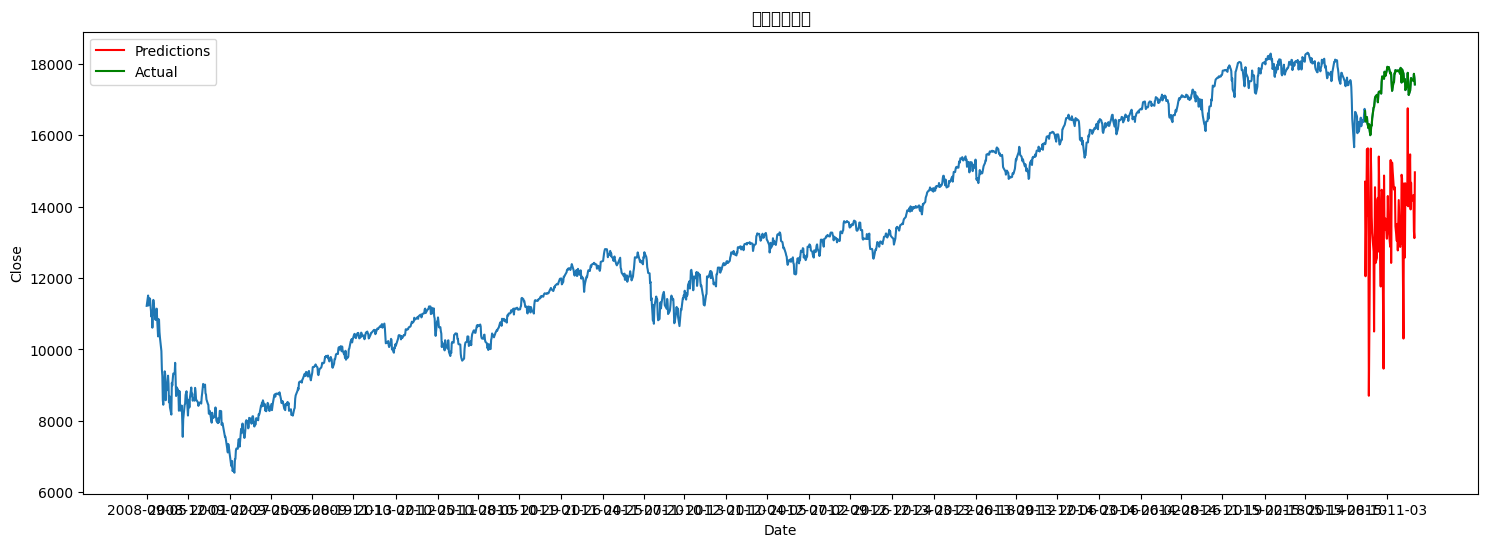

In [48]:


import matplotlib.pyplot as plt



# eval
multi_modal_model.eval()
rnn.eval()
finbert.eval()


predicted_values = []


with torch.no_grad():
    for i, (numerical_data, text_data, labels) in enumerate(tqdm(test_loader)):
        numerical_data, labels = numerical_data.to(device()), labels.to(device())
        text_data = [str(text) for text in text_data]
        ids = tokenizer.batch_encode_plus(
            text_data,
            padding='max_length',
            return_tensors='pt',
            truncation=True,
        )
        input_ids = ids['input_ids'].cuda()
        attention_mask = ids['attention_mask'].cuda()
        outputs = multi_modal_model(numerical_data, input_ids,attention_mask)
        predicted_values.extend(outputs.cpu().numpy().flatten())


# plot


plt.figure(figsize=(18, 6))
plt.plot(df['Date'], df['Close'])
plt.xlabel('Date')
plt.ylabel('Close')
plt.title('收盤價走勢圖')

plt.xticks(df.get('Date')[::60],rotation=0)

start_index = len(df) - len(predicted_values)

plt.plot(df['Date'][start_index:], predicted_values, color='red', label='Predictions')
plt.plot(df['Date'][start_index:], df['Close'][start_index:], color='green', label='Actual')
plt.legend()
plt.show()






In [49]:
labels

tensor([[[17477.6699],
         [17847.6309],
         [17730.5098],
         [17568.0000],
         [17492.3008]],

        [[17574.7500],
         [17265.2109],
         [17368.5000],
         [17524.9102],
         [17749.0898]],

        [[17495.8398],
         [17128.5508],
         [17251.6191],
         [17417.2695],
         [17602.6094]],

        [[17552.1699],
         [17528.2695],
         [17720.9805],
         [17603.8691],
         [17425.0293]]], device='cuda:0')

In [50]:
predicted_values

[14697.166,
 12050.985,
 15611.123,
 13749.582,
 15633.936,
 13694.416,
 8703.086,
 13821.795,
 15627.08,
 14913.995,
 13724.084,
 13275.233,
 12743.707,
 10502.903,
 12855.304,
 14544.698,
 12419.056,
 12562.568,
 14190.078,
 14247.019,
 12742.525,
 15404.559,
 12530.702,
 11763.448,
 13468.6,
 14473.901,
 14397.872,
 9462.855,
 14871.721,
 13349.289,
 13654.084,
 13667.611,
 13102.05,
 13483.187,
 14298.706,
 13574.667,
 13353.949,
 12874.983,
 15305.485,
 12424.106,
 14388.179,
 15236.496,
 14642.267,
 14477.703,
 14523.947,
 14541.974,
 13453.468,
 13038.844,
 13517.658,
 12774.195,
 14185.018,
 12871.631,
 13327.919,
 12968.172,
 14893.578,
 14794.566,
 10305.447,
 14649.951,
 13664.31,
 12575.353,
 14654.087,
 14042.925,
 14244.813,
 16755.752,
 14010.021,
 14183.857,
 15464.678,
 13923.216,
 14671.326,
 14156.624,
 14323.982,
 13308.309,
 13119.155,
 14962.045]